<a href="https://colab.research.google.com/github/Rup-02/parkinson-s-disease-prediction-system/blob/main/parkinson's_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from xgboost import XGBClassifier

import joblib



from IPython.display import display

In [3]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
url_string = 'https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data'


In [ ]:
url_content = requests.get(url_string).content
with open('data.csv', 'wb') as data_file:
  data_file.write(url_content)


In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
df.tail(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
185,phon_R01_S49_3,116.286,177.291,96.983,0.00314,0.00003,0.00134,0.00192,0.00403,0.01564,...,0.02001,0.00737,24.199,0,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
186,phon_R01_S49_4,116.556,592.030,86.228,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,...,0.02460,0.01397,23.958,0,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605
187,phon_R01_S49_5,116.342,581.289,94.246,0.00267,0.00002,0.00115,0.00148,0.00345,0.01300,...,0.01892,0.00680,25.023,0,0.528485,0.663884,-6.359018,0.116636,2.152083,0.138868
188,phon_R01_S49_6,114.563,119.167,86.647,0.00327,0.00003,0.00146,0.00184,0.00439,0.01185,...,0.01672,0.00703,24.775,0,0.555303,0.659132,-6.710219,0.149694,1.913990,0.121777
189,phon_R01_S50_1,201.774,262.707,78.228,0.00694,0.00003,0.00412,0.00396,0.01235,0.02574,...,0.04363,0.04441,19.368,0,0.508479,0.683761,-6.934474,0.159890,2.316346,0.112838
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


In [ ]:
df.drop(['name'], axis=1, inplace=True)

In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 23
Number of Instances In Dataset :  195


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df['status'] = df['status'].astype('uint8')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [ ]:
print('Number of Duplicated Rows :',df.duplicated().sum())

Number of Duplicated Rows : 0


In [ ]:
df.isna().sum()

,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0
MDVP:Shimmer(dB),0


<Axes: xlabel='status', ylabel='count'>

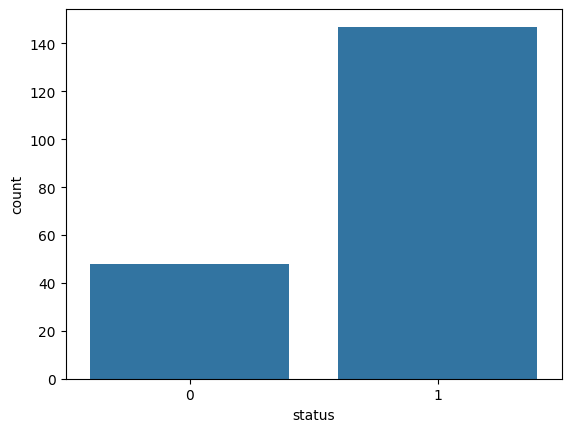

In [ ]:
sns.countplot(x='status',data=df)

<Axes: >

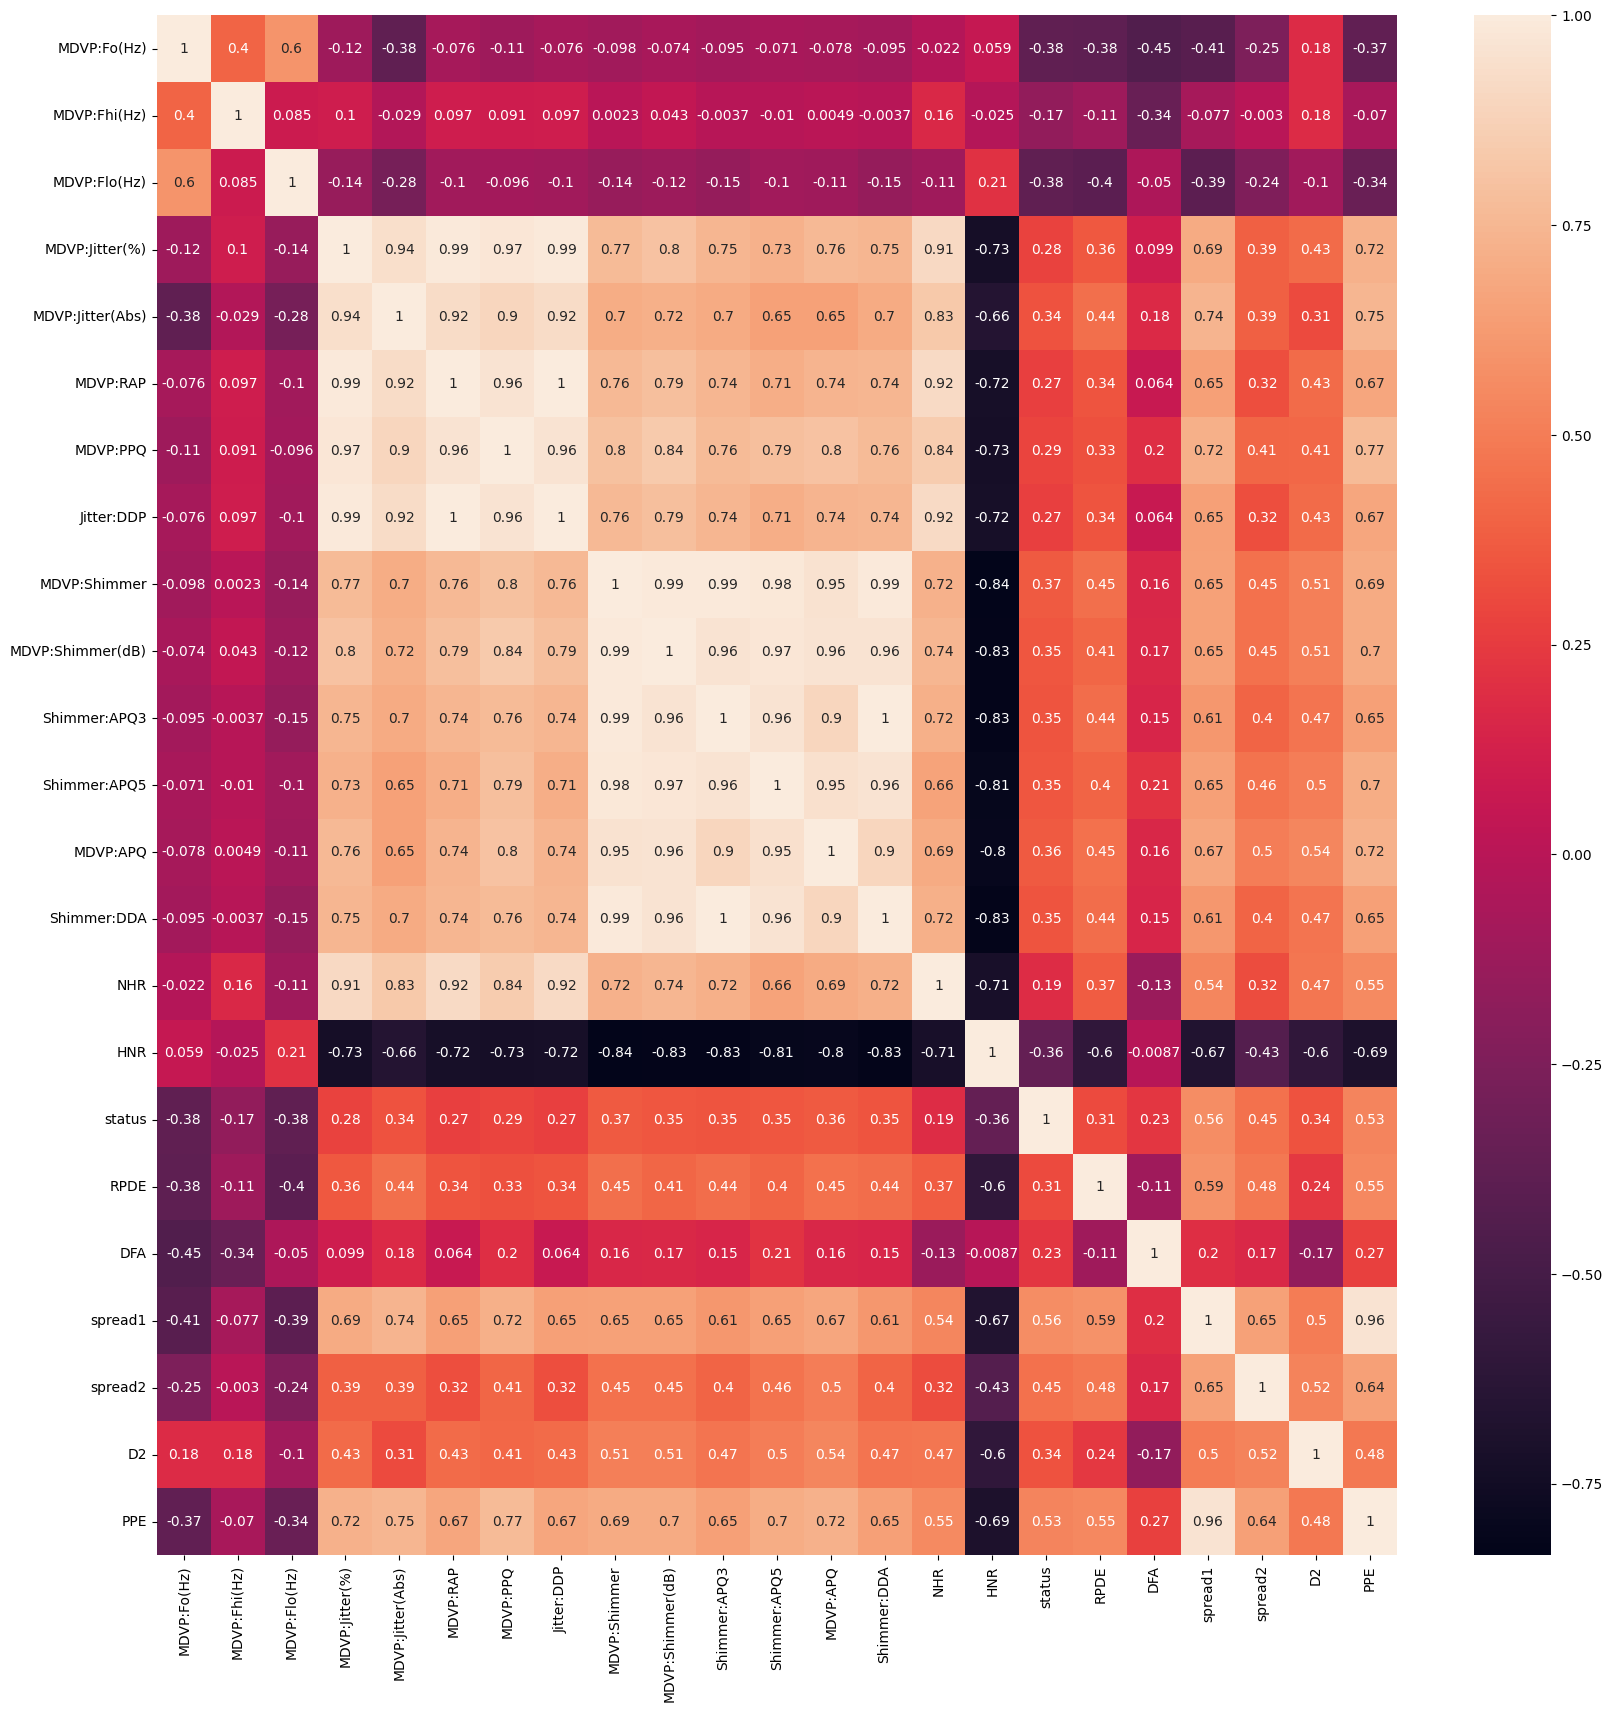

In [ ]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,ax=ax)

In [ ]:
df['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


In [ ]:
sm = SMOTE(random_state=300)

In [ ]:
X, y = sm.fit_resample(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


In [ ]:
scaler = MinMaxScaler((-1,1))

In [ ]:
X_features = scaler.fit_transform(X)
Y_labels = y


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_features, Y_labels , test_size=0.20, random_state=20)


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92        33
           1       0.86      0.96      0.91        26

    accuracy                           0.92        59
   macro avg       0.91      0.92      0.91        59
weighted avg       0.92      0.92      0.92        59



In [ ]:
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [ ]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'random_state': 120}

In [ ]:
dt1=DecisionTreeClassifier(random_state=120, max_features='sqrt', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test)
print(classification_report(y_test, predDT))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



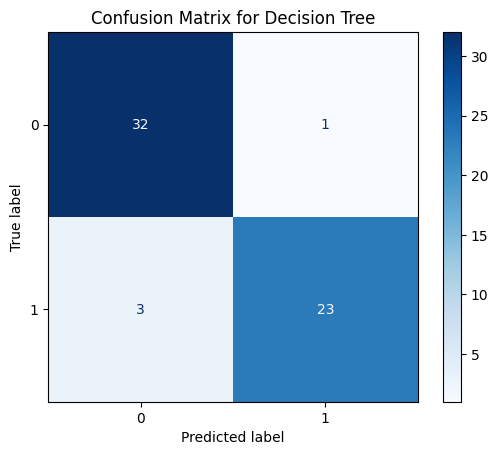

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = dt1.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt1.classes_)
disp.plot(cmap=plt.cm.Blues)


plt.title('Confusion Matrix for Decision Tree')
plt.show()


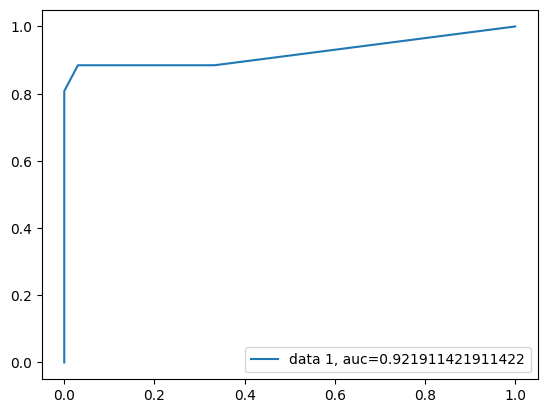

In [ ]:
y_pred_proba = dt1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()



In [ ]:
joblib.dump(dt1, 'dt_clf.pkl')


['dt_clf.pkl']

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.96      0.88      0.92        26

    accuracy                           0.93        59
   macro avg       0.94      0.93      0.93        59
weighted avg       0.93      0.93      0.93        59



In [ ]:
param_grid = {
    'n_estimators': range(100,150,200),
    'max_features': [ 'sqrt', 'log2'],
    'max_depth' :[3, 5, 7],

    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': range(100, 150, 200)})

In [ ]:
CV_rfc.best_params_


{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 100}

In [ ]:
rfc1=RandomForestClassifier(random_state=200, max_features='sqrt', n_estimators= 125, max_depth=7, criterion='entropy')
rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.96      0.96      0.96        26

    accuracy                           0.97        59
   macro avg       0.97      0.97      0.97        59
weighted avg       0.97      0.97      0.97        59



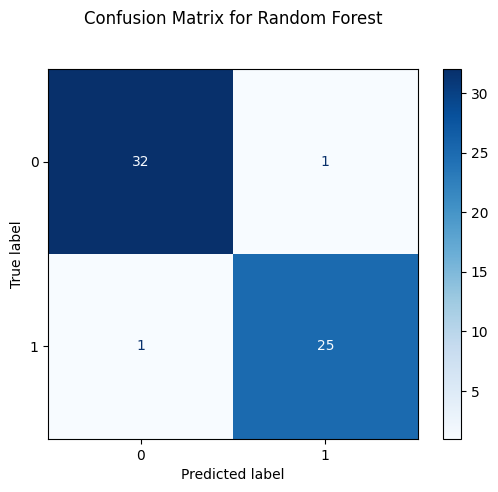

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels
y_pred = rfc1.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc1.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for Random Forest', y=1.1)
plt.show()



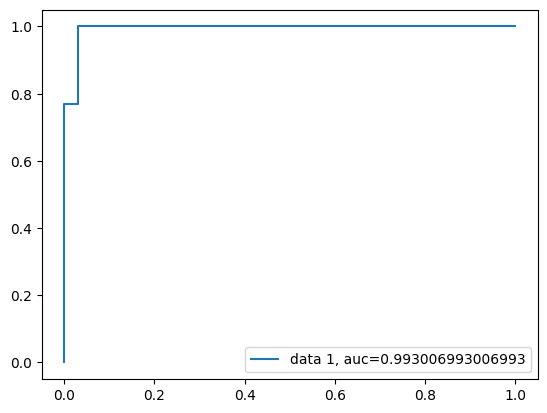

In [ ]:
y_pred_proba = rfc1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
joblib.dump(rfc1, 'rf_clf.pkl')

['rf_clf.pkl']

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
predlog = logmodel.predict(X_test)

In [ ]:
print(classification_report(y_test, predlog))
print("Confusion Matrix:")
confusion_matrix(y_test, predlog)


              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.90      0.69      0.78        26

    accuracy                           0.83        59
   macro avg       0.85      0.82      0.82        59
weighted avg       0.84      0.83      0.83        59

Confusion Matrix:


array([[31,  2],
       [ 8, 18]])

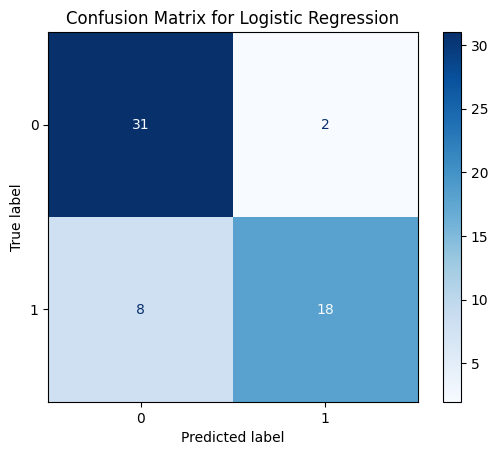

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels using the logistic regression model
y_pred = logmodel.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


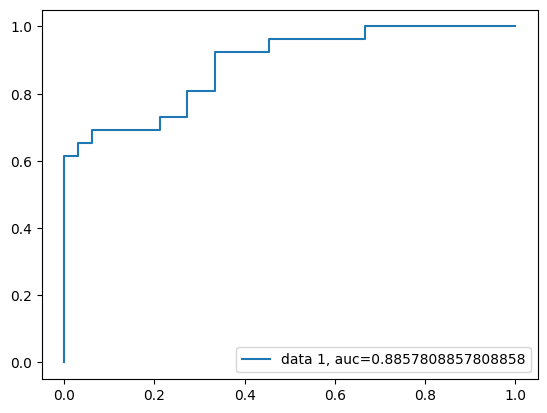

In [ ]:
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(logmodel, 'lg_clf.pkl')


['lg_clf.pkl']

In [ ]:


#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Test Set Accuracy:",metrics.accuracy_score(y_test, y_pred))

X_pred = clf.predict(X_train)
print("Train Set Accuracy:",metrics.accuracy_score(y_train, X_pred))

Test Set Accuracy: 0.8135593220338984
Train Set Accuracy: 0.8638297872340426


In [ ]:
param_grid = {'kernel':['linear','rbf','poly'],'C': [0.5, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

grid_SVC = GridSearchCV(svm.SVC(), param_grid, scoring='f1', verbose = 3)
grid_SVC.fit(X_train, y_train)

# print best parameter after tuning
print("\nBest Parameters: ", grid_SVC.best_params_)

# print how our model looks after hyper-parameter tuning
print("\n", grid_SVC.best_estimator_)

predSVC = grid_SVC.predict(X_test)

# print classification report
print("\n", classification_report(y_test, predSVC))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.913 total time=   0.0s
[CV 2/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.884 total time=   0.0s
[CV 3/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 4/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.744 total time=   0.0s
[CV 5/5] END .....C=0.5, gamma=1, kernel=linear;, score=0.818 total time=   0.0s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.933 total time=   0.0s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.979 total time=   0.0s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.894 total time=   0.0s
[CV 1/5] END .......C=0.5, gamma=1, kernel=poly;, score=0.894 total time=   0.0s
[CV 2/5] END .......C=0.5, gamma=1, kernel=poly

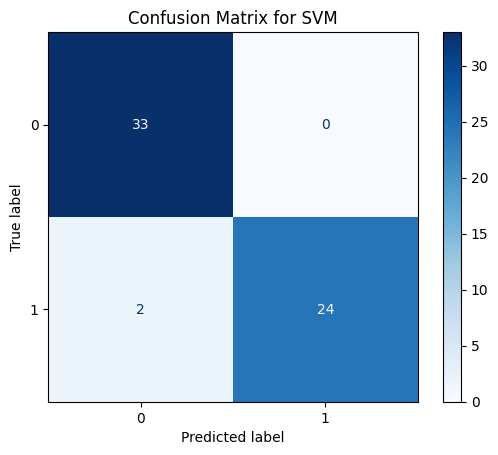

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels using the trained SVM model
y_pred = grid_SVC.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_SVC.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for SVM')
plt.show()


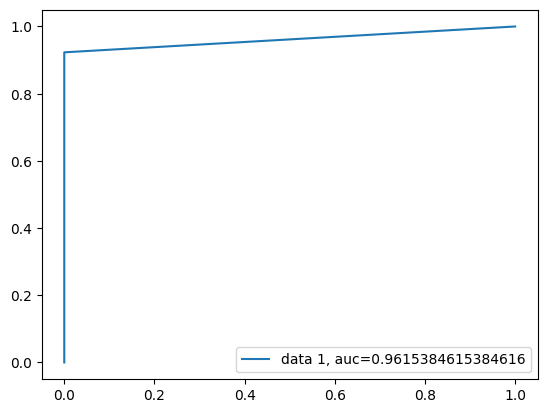

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test,  predSVC)
auc = metrics.roc_auc_score(y_test, predSVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [ ]:
joblib.dump(grid_SVC, 'svm_clf.pkl')

['svm_clf.pkl']

In [ ]:
# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82        33
           1       0.93      0.50      0.65        26

    accuracy                           0.76        59
   macro avg       0.82      0.73      0.74        59
weighted avg       0.81      0.76      0.75        59



In [ ]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)


Confusion Matrix:


array([[32,  1],
       [13, 13]])

In [ ]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

Accuracy % : 76.27118644067797


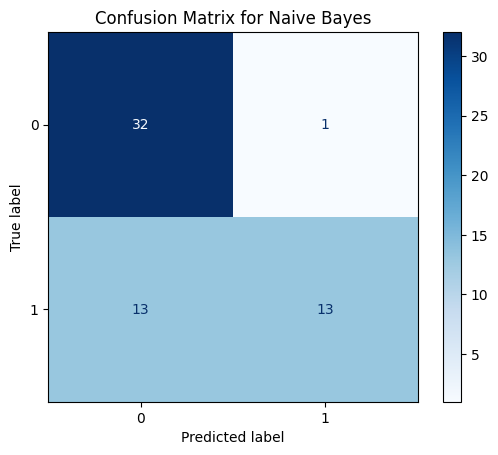

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels using the Naive Bayes model
y_pred = gnb.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


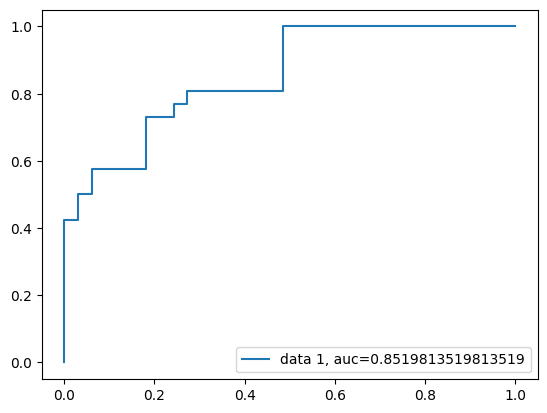

In [ ]:
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(gnb, 'nb_clf.pkl')


['nb_clf.pkl']

In [ ]:
#KNN
import numpy as np

Ks = 10
mean_acc = []
ConfustionMx = [];
for n in range(2,Ks):

    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc.append(metrics.accuracy_score(y_test, yhat))
print('Neighbor Accuracy List')
print(mean_acc)

Neighbor Accuracy List
[0.9491525423728814, 0.9661016949152542, 0.9661016949152542, 0.9661016949152542, 0.9152542372881356, 0.9152542372881356, 0.8983050847457628, 0.9152542372881356]


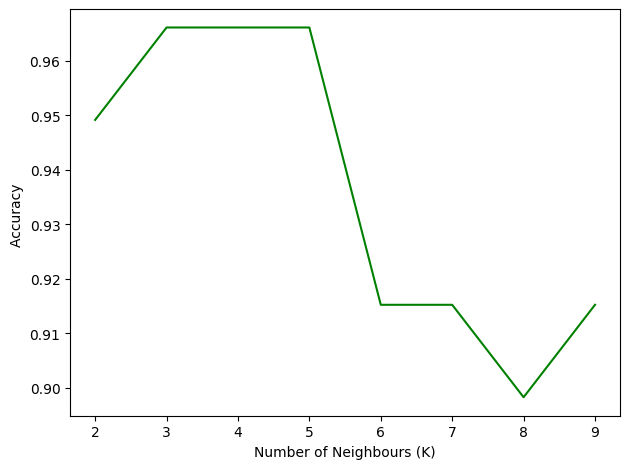

In [ ]:
plt.plot(range(2,Ks),mean_acc,'g')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predKNN = knn.predict(X_test)


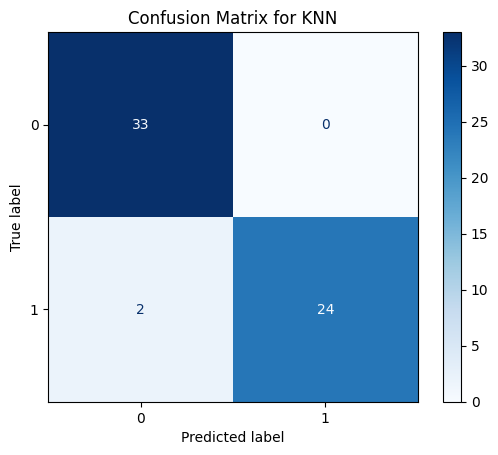

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict the labels using the KNN model
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues)

# Add a title
plt.title('Confusion Matrix for KNN')
plt.show()




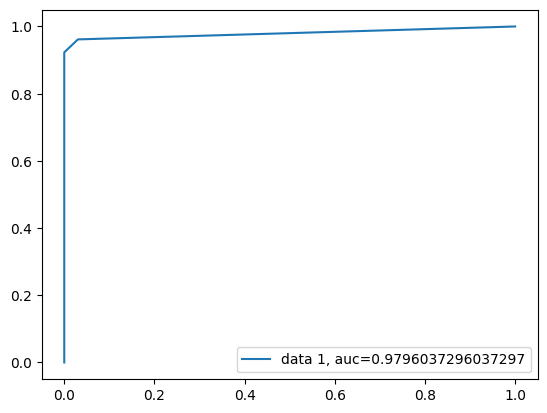

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(knn, 'knn_clf.pkl')

['knn_clf.pkl']

In [ ]:
joblib.dump(xgb_clf, 'xgb_clf.pkl')


['xgb_clf.pkl']

In [ ]:
from sklearn.metrics import precision_score,recall_score ,accuracy_score, f1_score, r2_score, log_loss

chart = {
        'Metric':["Accuracy", "F1-Score", "Recall", "Precision", "R2-Score"],
        'DT':[accuracy_score(y_test, predDT), f1_score(y_test, predDT), recall_score(y_test, predDT), precision_score(y_test, predDT), r2_score(y_test, predDT)],
        'RF':[accuracy_score(y_test, predRFC), f1_score(y_test, predRFC), recall_score(y_test, predRFC), precision_score(y_test, predRFC), r2_score(y_test, predRFC)],
        'LR':[accuracy_score(y_test, predlog), f1_score(y_test, predlog), recall_score(y_test, predlog), precision_score(y_test, predlog), r2_score(y_test, predlog)],
        'SVM':[accuracy_score(y_test, predSVC), f1_score(y_test, predSVC), recall_score(y_test, predSVC), precision_score(y_test, predSVC), r2_score(y_test, predSVC)],
        'NB':[accuracy_score(y_test, predgnb), f1_score(y_test, predgnb), recall_score(y_test, predgnb), precision_score(y_test, predgnb), r2_score(y_test, predgnb)],
        'KNN':[accuracy_score(y_test, predKNN), f1_score(y_test, predKNN), recall_score(y_test, predKNN), precision_score(y_test, predKNN), r2_score(y_test, predKNN)],

}
chart = pd.DataFrame(chart)

In [ ]:
display(chart)

,Metric,DT,RF,LR,SVM,NB,KNN
0,Accuracy,0.932203,0.966102,0.830508,0.966102,0.762712,0.966102
1,F1-Score,0.920000,0.961538,0.782609,0.960000,0.650000,0.960000
2,Recall,0.884615,0.961538,0.692308,0.923077,0.500000,0.923077
3,Precision,0.958333,0.961538,0.900000,1.000000,0.928571,1.000000
4,R2-Score,0.724942,0.862471,0.312354,0.862471,0.037296,0.862471


In [ ]:
import pickle


In [ ]:
filename="Data Science Final.sav"
pickle.dump(rfc,open(filename, 'wb'))

In [ ]:
model=pickle.load(open('Data Science Final.sav','rb'))

In [ ]:
# Save the model
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assuming you have trained your model
model = RandomForestClassifier()
# ... train your model ...

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import numpy as np
import pickle
import streamlit as st

# Load the model from the file
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

def park_prediction(input_data):
    input_data_as_numpy_array = np.asarray(input_data)

    # Reshape input data for scaling
    input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
    prediction = model.predict(input_data_reshaped)
    print(prediction)

    if (prediction[0] == 0):
        return 'The person is not suffering from Parkinson disease'
    else:
        return 'The person may have Parkinson disease. Consult your doctor.'

def main():
    st.title('Parkinson Prediction')

    # Collecting input data from the user
    MDVP1 = st.number_input('MDVP:Fo(Hz)')
    MDVP2 = st.number_input('MDVP:Fhi(Hz)')
    MDVP3 = st.number_input('MDVP:Flo(Hz)')
    MDVP4 = st.number_input('MDVP:Jitter(%)')

    # Add a button to make the prediction
    if st.button('Predict'):
        result = park_prediction([MDVP1, MDVP2, MDVP3, MDVP4])
        st.success(result)

if __name__ == '__main__':
    main()

2024-12-23 08:02:21.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 08:02:21.994 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 08:02:21.997 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 08:02:21.999 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 08:02:22.002 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 08:02:22.005 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 08:02:22.007 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-23 08:02:22.008 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar